<b>environment:</b> deg_env, python=3.9.7

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import gseapy as gp
from gseapy import dotplot, barplot, enrichment_map
import networkx as nx

from filter_adata import adata_filtered, adata_hightumour, adata_peritumour
from differential_expression import run_DEG_wilcoxon

adata and clinical merged, rename the columns if you want
clusters are now annotated with specific and broad cell types


/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/final_files/filter_adata.py:194: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.loc[melanoma_clusters]
/Users/nabilazulkapeli/Documents/Honours Thesis 2025/nabs_data/final_files/filter_adata.py:213: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs


low quality cores with <1000 total cells or <100 melanoma cells have been removed
adata_filtered (both high tumour and peritumour cores) has been created
adata_hightumour (only high tumour cores) has been created
adata_peritumour (only peritumour cores) has been created
ready for downstream analysis, you can choose adata_filtered for global analysis and adata_peritumour/adata_hightumour for region-specific analyses


In [2]:
# rename long gene sets
global_short_names = {
    # KEGG
    "KEGG_MELANOMA.v2025.1.Hs.gmt__KEGG_MELANOMA": "Melanoma Pathway",

    # Hallmark
    "MSigDB_Hallmark_2020__Interferon Alpha Response": "IFN-α Response",
    "MSigDB_Hallmark_2020__Interferon Gamma Response": "IFN-γ Response",
    "MSigDB_Hallmark_2020__Apoptosis": "Apoptosis",
    "MSigDB_Hallmark_2020__p53 Pathway": "p53 Pathway",
    "MSigDB_Hallmark_2020__TNF-alpha Signaling via NF-kB": "TNFα/NF-κB Signalling",
    "MSigDB_Hallmark_2020__KRAS Signaling Up": "KRAS Signalling (Up)",
    "MSigDB_Hallmark_2020__Complement": "Complement",
    "MSigDB_Hallmark_2020__Estrogen Response Late": "Estrogen Response (Late)",
    "MSigDB_Hallmark_2020__G2-M Checkpoint": "G2/M Checkpoint",
    "MSigDB_Hallmark_2020__IL-2/STAT5 Signaling": "IL-2/STAT5 Signalling",
    "MSigDB_Hallmark_2020__IL-6/JAK/STAT3 Signaling": "IL-6/JAK/STAT3 Signalling",
    "MSigDB_Hallmark_2020__Epithelial Mesenchymal Transition": "EMT",
    "MSigDB_Hallmark_2020__Allograft Rejection": "Allograft Rejection",
    "MSigDB_Hallmark_2020__Glycolysis": "Glycolysis",
    "MSigDB_Hallmark_2020__Inflammatory Response": "Inflammatory Response",
    "MSigDB_Hallmark_2020__PI3K/AKT/mTOR  Signaling": "PI3K/AKT/mTOR Signalling",

    # Oncogenic signatures
    "MSigDB_Oncogenic_Signatures__SNF5 DN.V1 UP": "SNF5 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__IL15 UP.V1 UP": "IL15 (Up)",
    "MSigDB_Oncogenic_Signatures__EGFR UP.V1 UP": "EGFR (Up)",
    "MSigDB_Oncogenic_Signatures__HOXA9 DN.V1 UP": "HOXA9 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__LTE2 UP.V1 DN": "LTE2 (Down)",
    "MSigDB_Oncogenic_Signatures__MEL18 DN.V1 UP": "MEL18 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__WNT UP.V1 UP": "WNT (Up)",
    "MSigDB_Oncogenic_Signatures__KRAS.600.LUNG.BREAST UP.V1 UP": "KRAS 600 (Lung/Breast, Up)",
    "MSigDB_Oncogenic_Signatures__KRAS.600 UP.V1 UP": "KRAS 600 (Up)",
    "MSigDB_Oncogenic_Signatures__KRAS.LUNG UP.V1 UP": "KRAS (Lung, Up)",
    "MSigDB_Oncogenic_Signatures__KRAS.LUNG.BREAST UP.V1 UP": "KRAS (Lung/Breast, Up)",
    "MSigDB_Oncogenic_Signatures__ALK DN.V1 UP": "ALK Loss (Down)",
    "MSigDB_Oncogenic_Signatures__BMI1 DN.V1 UP": "BMI1 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__P53 DN.V1 DN": "p53 Loss (Down)",
    "MSigDB_Oncogenic_Signatures__P53 DN.V2 UP": "p53 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__STK33 UP": "STK33 (Up)",
    "MSigDB_Oncogenic_Signatures__VEGF A UP.V1 UP": "VEGFA (Up)",
    "MSigDB_Oncogenic_Signatures__LEF1 UP.V1 UP": "LEF1 (Up)",
    "MSigDB_Oncogenic_Signatures__STK33 SKM UP": "STK33 (SKM, Up)",
    "MSigDB_Oncogenic_Signatures__E2F1 UP.V1 DN": "E2F1 (Down)",
    "MSigDB_Oncogenic_Signatures__RPS14 DN.V1 UP": "RPS14 Loss (Up)",
    "MSigDB_Oncogenic_Signatures__CYCLIN D1 KE .V1 DN": "Cyclin D1 Loss (Down)",
    "MSigDB_Oncogenic_Signatures__NFE2L2.V2": "NFE2L2",
    "MSigDB_Oncogenic_Signatures__STK33 NOMO UP": "STK33 (NOMO, Up)",
    "MSigDB_Oncogenic_Signatures__IL2 UP.V1 UP": "IL2 (Up)"
}

<h1><b>Global Analysis

Running DEG on each cell type...
Wilcoxon rank-sum test successful for Proliferating Melanoma!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Granulocyte!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Epithelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Inflammatory CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Endothelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD8 T!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for M2 TAM!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Classical CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Plasmablast!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Dendritic!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for M1 TAM!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD4 T!

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46410/2238965533.py:18: DeprecationWarning: processes is deprecated; use threads
  pre = gp.prerank(
2025-09-25 13:36:44,469 [WARNING] Duplicated values found in preranked stats: 11.25% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


Wilcoxon rank-sum test successful for Mast!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for TLS!


/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46410/2238965533.py:96: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nodes["NES_plot"] = nodes["NES_plot"].fillna(0.0)


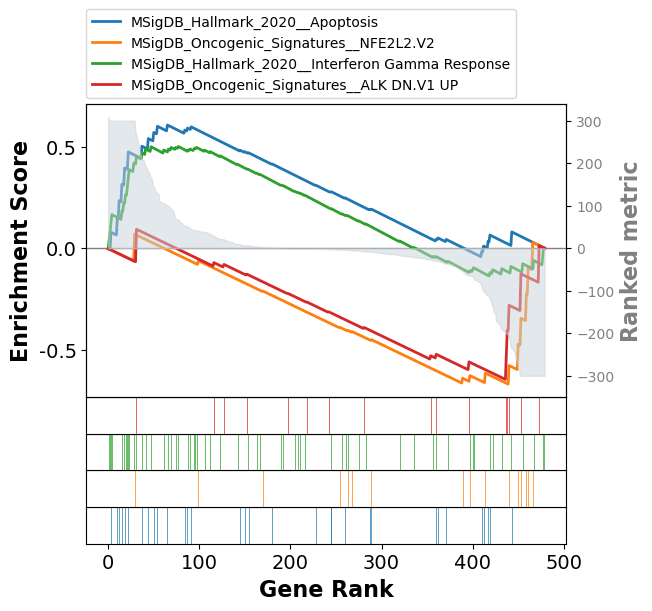

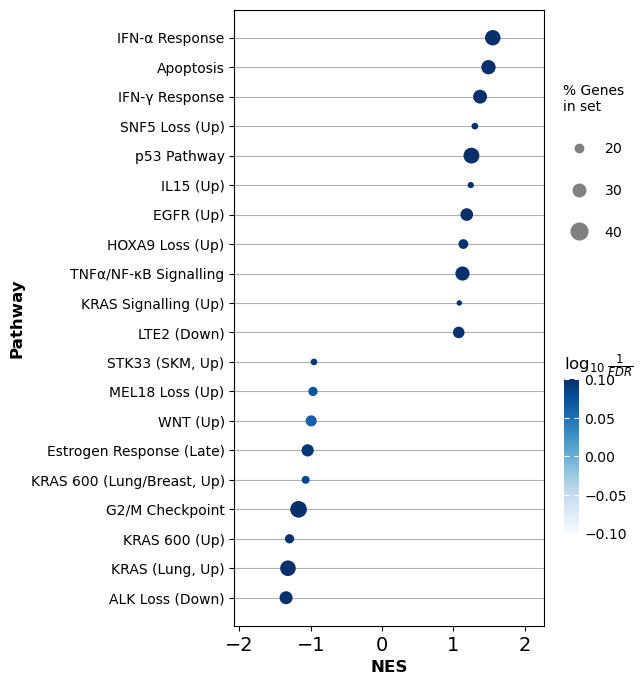

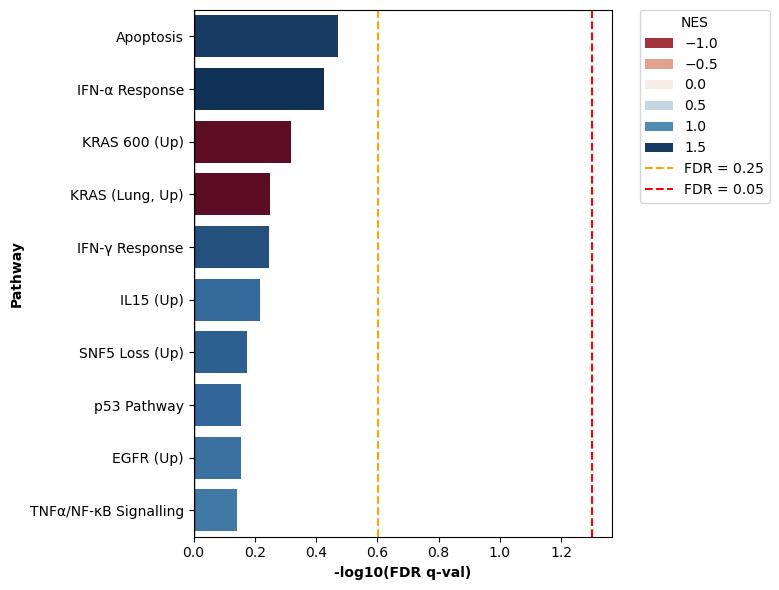

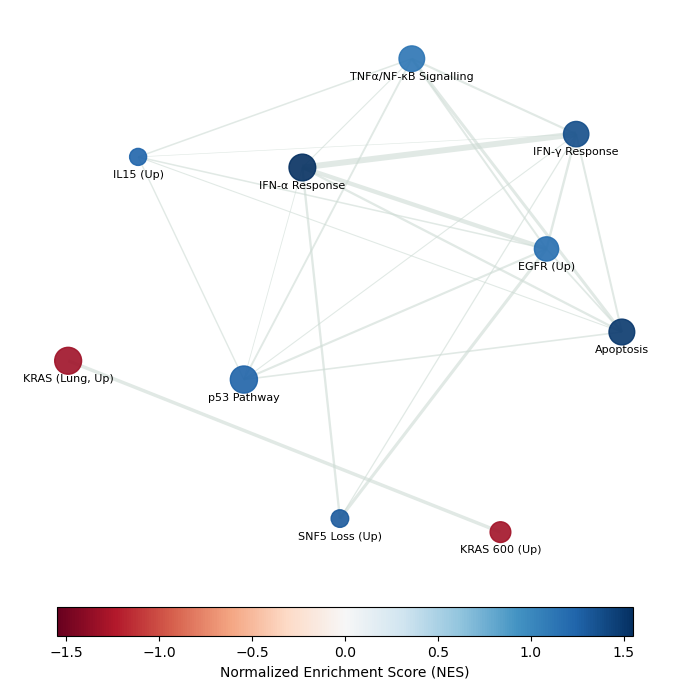

In [9]:
global_DEG = run_DEG_wilcoxon(
    adata=adata_filtered,
    response_col='Response',
    celltype_col='specific_cell_types'
)

global_clean = (global_DEG
         .assign(pval=global_DEG['pval'].fillna(1),             # replace NaN values in pval column with 1 (non-significant)
                 log2fc=global_DEG['log2fc'].fillna(0))         # replace NaN values in lfc column with 0 (no effect size)
         .loc[:, ['gene','score']].dropna())                    # just keep the gene and score columns for ranking

global_rnk = (global_clean
         .drop_duplicates('gene', keep='first')                 # drop duplicate genes, keep the first
         .set_index('gene')['score']                            
         .sort_values(ascending=False))

# prerank
pre = gp.prerank(
        rnk=global_rnk, 
        gene_sets=["MSigDB_Oncogenic_Signatures",
                   "MSigDB_Hallmark_2020"],
        processes=4, 
        permutation_num=1000, 
        seed=7,
        ascending=False)

pre.res2d['ShortName'] = pre.res2d['Term'].map(global_short_names).fillna(pre.res2d['Term'])    # map onto pre for plotting

# GSEA plot 
terms = pre.res2d.Term
ax = pre.plot(terms=terms[1:5],
                   show_ranking=True,               # ranked metric y-axis
                   figsize=(3,4)                  )

# dotplot
global_dotplot = dotplot(pre.res2d,
                         column="FDR q-val",
                         top_term=20,         # show top 20
                         cutoff=1,            # ignore FDR/p-val filtering
                         cmap='Blues',
                         figsize=(5,8),
                         show_ring=False,
                         y='ShortName',
)
global_dotplot.tick_params(axis="y", labelsize=10)
global_dotplot.set_ylabel("Pathway", fontsize=12, fontweight="bold")
global_dotplot.set_xlabel("NES", fontsize=12, fontweight="bold")

# barplot
df = pre.res2d.copy()
df["FDR q-val"] = pd.to_numeric(df["FDR q-val"], errors="coerce")   # make sure FDR q-val column is numeric to prevent log-transform errors
df["-log10(FDR)"] = -np.log10(df["FDR q-val"])                      # add log-transformed FDR q-val column
# Filter top 20 significant terms
df_top = df.sort_values("FDR q-val").head(10)

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_top, 
            x="-log10(FDR)", 
            y="ShortName", 
            hue="NES", 
            dodge=False, 
            palette="RdBu")

plt.axvline(0, color="black", lw=1)
plt.axvline(x=-np.log10(0.25), color="orange", linestyle="--", linewidth=1.5, label="FDR = 0.25")
plt.axvline(x=-np.log10(0.05), color="red", linestyle="--", linewidth=1.5, label="FDR = 0.05")
ax.set_xlabel("-log10(FDR q-val)", fontsize=10, fontweight="bold")
ax.set_ylabel("Pathway", fontsize=10, fontweight="bold")

# Create the legend first
leg = plt.legend(
    bbox_to_anchor=(1.05, 1.013),
    loc="upper left"
    )
leg.set_title("NES")
leg.get_title().set_position((-10, 0))  # shift title left (adjust -10 as needed)
plt.tight_layout()

# build enrichment map tables
nodes, edges = enrichment_map(pre.res2d, cutoff=1)

# use NES from pre.res2d via ShortName
nes_map = (pre.res2d
           .assign(absNES=lambda d: d["NES"].abs())
           .sort_values("absNES", ascending=False)
           .drop_duplicates("ShortName")
           .set_index("ShortName")["NES"])

nodes["NES_plot"] = nodes["ShortName"].map(nes_map)
# fallback via Term if any missing
if nodes["NES_plot"].isna().any():
    nodes.loc[nodes["NES_plot"].isna(), "NES_plot"] = (
        nodes.loc[nodes["NES_plot"].isna(), "Term"]
             .map(pre.res2d.set_index("Term")["NES"])
    )
nodes["NES_plot"] = nodes["NES_plot"].fillna(0.0)

# Build graph
G = nx.from_pandas_edgelist(
    edges, source="src_idx", target="targ_idx",
    edge_attr=["jaccard_coef", "overlap_coef", "overlap_genes"]
)

# align everything to an explicit nodelist 
nodelist = list(G.nodes())
vals   = nodes.loc[nodelist, "NES_plot"].to_numpy()
sizes  = (nodes.loc[nodelist, "Hits_ratio"] * 1000).to_numpy()
labels = nodes.loc[nodelist, "ShortName"].to_dict()

# colormap, symmetric around 0
abs_max = np.nanmax(np.abs(vals))
norm = mcolors.TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)
cmap = plt.cm.RdBu

# network plot
fig, ax = plt.subplots(figsize=(7,7))
pos = nx.spring_layout(G, seed=42, k=2.5)

nx.draw_networkx_nodes(
    G, pos, nodelist=nodelist,
    node_color=[cmap(norm(v)) for v in vals],
    node_size=sizes, alpha=0.9, ax=ax
)

# keep edge widths aligned
edgelist = list(G.edges())
edge_w = [G[u][v]["jaccard_coef"]*10 for u,v in edgelist]
nx.draw_networkx_edges(G, pos, edgelist=edgelist,
                       width=edge_w, edge_color="#CDDBD4", alpha=0.6, ax=ax)

label_pos = {n:(x, y-0.05) for n,(x,y) in pos.items()}
nx.draw_networkx_labels(G, label_pos, labels=labels, font_size=8, verticalalignment="top", ax=ax)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.046, pad=0.04)
cbar.set_label("Normalized Enrichment Score (NES)")

ax.axis("off")
plt.tight_layout()
plt.show()

<h1><b>High Tumour Analysis

Running DEG on each cell type...
Wilcoxon rank-sum test successful for Proliferating Melanoma!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Granulocyte!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Epithelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Inflammatory CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Endothelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD8 T!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for M2 TAM!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Classical CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Plasmablast!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Dendritic!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for M1 TAM!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD4 T!

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46410/4237385663.py:18: DeprecationWarning: processes is deprecated; use threads
  pre = gp.prerank(
2025-09-25 13:37:30,447 [WARNING] Duplicated values found in preranked stats: 9.17% of genes
The order of those genes will be arbitrary, which may produce unexpected results.


Wilcoxon rank-sum test successful for TLS!


/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46410/4237385663.py:96: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nodes["NES_plot"] = nodes["NES_plot"].fillna(0.0)


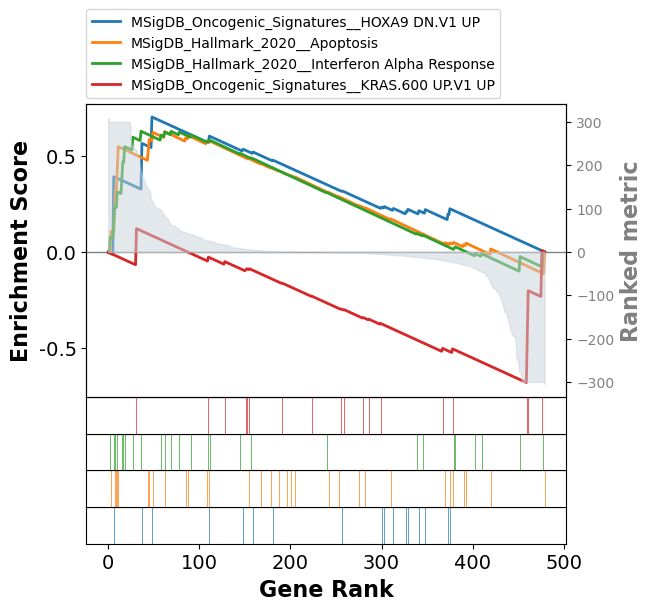

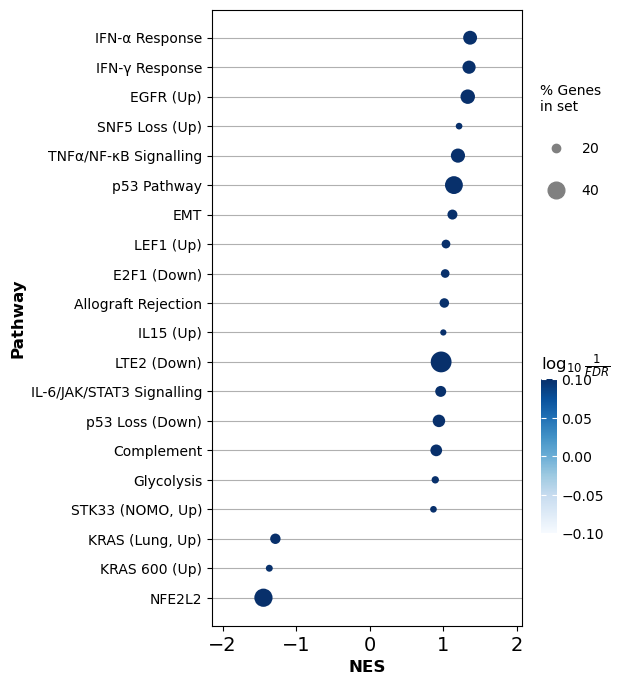

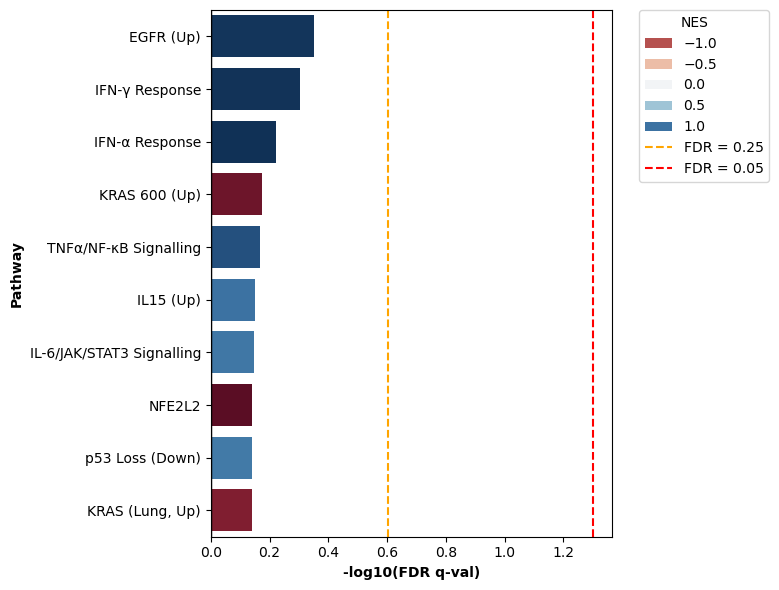

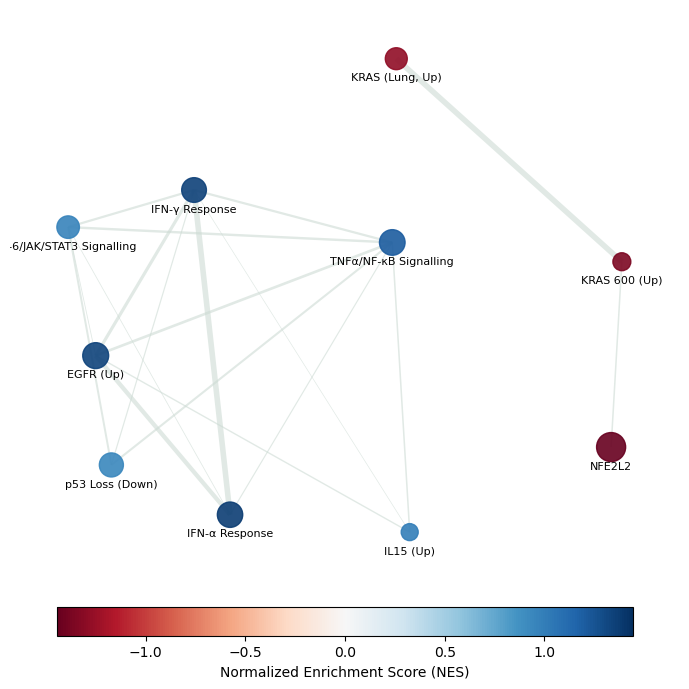

In [10]:
ht_DEG = run_DEG_wilcoxon(
    adata=adata_hightumour,
    response_col='Response',
    celltype_col='specific_cell_types'
)

ht_clean = (ht_DEG
         .assign(pval=ht_DEG['pval'].fillna(1),             # replace NaN values in pval column with 1 (non-significant)
                 log2fc=ht_DEG['log2fc'].fillna(0))         # replace NaN values in lfc column with 0 (no effect size)
         .loc[:, ['gene','score']].dropna())                    # just keep the gene and score columns for ranking

ht_rnk = (ht_clean
         .drop_duplicates('gene', keep='first')                 # drop duplicate genes, keep the first
         .set_index('gene')['score']                            
         .sort_values(ascending=False))

# prerank
pre = gp.prerank(
        rnk=ht_rnk, 
        gene_sets=["MSigDB_Oncogenic_Signatures",
                   "MSigDB_Hallmark_2020"],
        processes=4, 
        permutation_num=1000, 
        seed=7,
        ascending=False)

pre.res2d['ShortName'] = pre.res2d['Term'].map(global_short_names).fillna(pre.res2d['Term'])    # map onto pre for plotting

# GSEA plot 
terms = pre.res2d.Term
ax = pre.plot(terms=terms[1:5],
                   show_ranking=True,               # ranked metric y-axis
                   figsize=(3,4)                  )

# dotplot
global_dotplot = dotplot(pre.res2d,
                         column="FDR q-val",
                         top_term=20,         # show top 20
                         cutoff=1,            # ignore FDR/p-val filtering
                         cmap='Blues',
                         figsize=(5,8),
                         show_ring=False,
                         y='ShortName',
)
global_dotplot.tick_params(axis="y", labelsize=10)
global_dotplot.set_ylabel("Pathway", fontsize=12, fontweight="bold")
global_dotplot.set_xlabel("NES", fontsize=12, fontweight="bold")

# barplot
df = pre.res2d.copy()
df["FDR q-val"] = pd.to_numeric(df["FDR q-val"], errors="coerce")   # make sure FDR q-val column is numeric to prevent log-transform errors
df["-log10(FDR)"] = -np.log10(df["FDR q-val"])                      # add log-transformed FDR q-val column
# Filter top 20 significant terms
df_top = df.sort_values("FDR q-val").head(10)

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_top, 
            x="-log10(FDR)", 
            y="ShortName", 
            hue="NES", 
            dodge=False, 
            palette="RdBu")

plt.axvline(0, color="black", lw=1)
plt.axvline(x=-np.log10(0.25), color="orange", linestyle="--", linewidth=1.5, label="FDR = 0.25")
plt.axvline(x=-np.log10(0.05), color="red", linestyle="--", linewidth=1.5, label="FDR = 0.05")
ax.set_xlabel("-log10(FDR q-val)", fontsize=10, fontweight="bold")
ax.set_ylabel("Pathway", fontsize=10, fontweight="bold")

# Create the legend first
leg = plt.legend(
    bbox_to_anchor=(1.05, 1.013),
    loc="upper left"
    )
leg.set_title("NES")
leg.get_title().set_position((-10, 0))  # shift title left (adjust -10 as needed)
plt.tight_layout()

# build enrichment map tables
nodes, edges = enrichment_map(pre.res2d, cutoff=1)

# use NES from pre.res2d via ShortName
nes_map = (pre.res2d
           .assign(absNES=lambda d: d["NES"].abs())
           .sort_values("absNES", ascending=False)
           .drop_duplicates("ShortName")
           .set_index("ShortName")["NES"])

nodes["NES_plot"] = nodes["ShortName"].map(nes_map)
# fallback via Term if any missing
if nodes["NES_plot"].isna().any():
    nodes.loc[nodes["NES_plot"].isna(), "NES_plot"] = (
        nodes.loc[nodes["NES_plot"].isna(), "Term"]
             .map(pre.res2d.set_index("Term")["NES"])
    )
nodes["NES_plot"] = nodes["NES_plot"].fillna(0.0)

# Build graph
G = nx.from_pandas_edgelist(
    edges, source="src_idx", target="targ_idx",
    edge_attr=["jaccard_coef", "overlap_coef", "overlap_genes"]
)

# align everything to an explicit nodelist 
nodelist = list(G.nodes())
vals   = nodes.loc[nodelist, "NES_plot"].to_numpy()
sizes  = (nodes.loc[nodelist, "Hits_ratio"] * 1000).to_numpy()
labels = nodes.loc[nodelist, "ShortName"].to_dict()

# colormap, symmetric around 0
abs_max = np.nanmax(np.abs(vals))
norm = mcolors.TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)
cmap = plt.cm.RdBu

# network plot
fig, ax = plt.subplots(figsize=(7,7))
pos = nx.spring_layout(G, seed=42, k=2.5)

nx.draw_networkx_nodes(
    G, pos, nodelist=nodelist,
    node_color=[cmap(norm(v)) for v in vals],
    node_size=sizes, alpha=0.9, ax=ax
)

# keep edge widths aligned
edgelist = list(G.edges())
edge_w = [G[u][v]["jaccard_coef"]*10 for u,v in edgelist]
nx.draw_networkx_edges(G, pos, edgelist=edgelist,
                       width=edge_w, edge_color="#CDDBD4", alpha=0.6, ax=ax)

label_pos = {n:(x, y-0.05) for n,(x,y) in pos.items()}
nx.draw_networkx_labels(G, label_pos, labels=labels, font_size=8, verticalalignment="top", ax=ax)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.046, pad=0.04)
cbar.set_label("Normalized Enrichment Score (NES)")

ax.axis("off")
plt.tight_layout()
plt.show()

<h1><b>Peritumour Analysis

Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD4 T!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Plasmablast!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Proliferating Melanoma!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Epithelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Granulocyte!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for M2 TAM!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for CD8 T!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Inflammatory CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Dendritic!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Classical CAF!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Endothelial!
Running DEG on each cell type...
Wilcoxon rank-sum test successful for Mast!
R

/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46410/517089432.py:18: DeprecationWarning: processes is deprecated; use threads
  pre = gp.prerank(
/var/folders/3p/y9w6kn9d25q5ppxs6mh5ps3m0000gn/T/ipykernel_46410/517089432.py:96: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  nodes["NES_plot"] = nodes["NES_plot"].fillna(0.0)


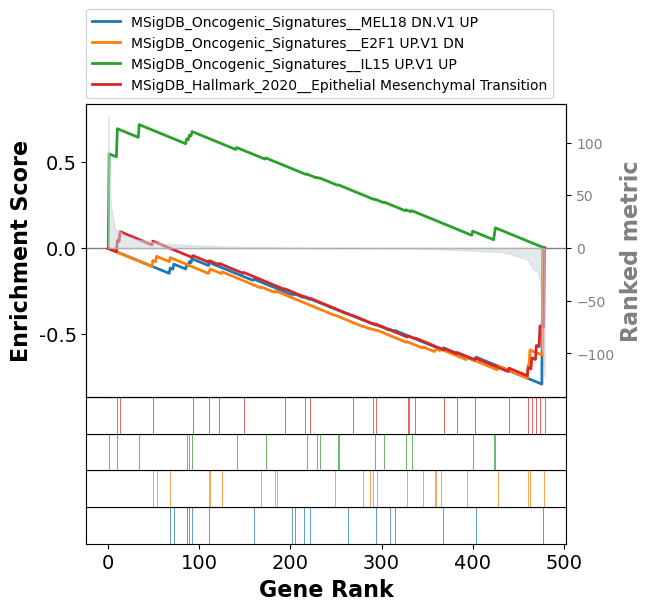

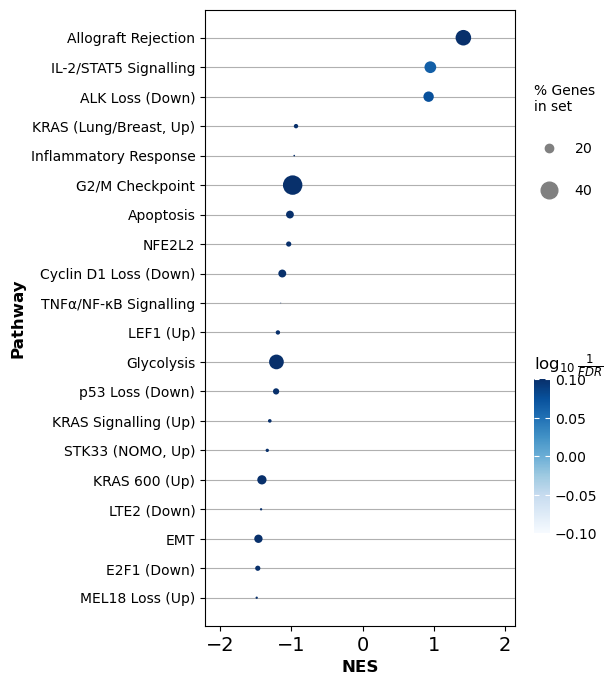

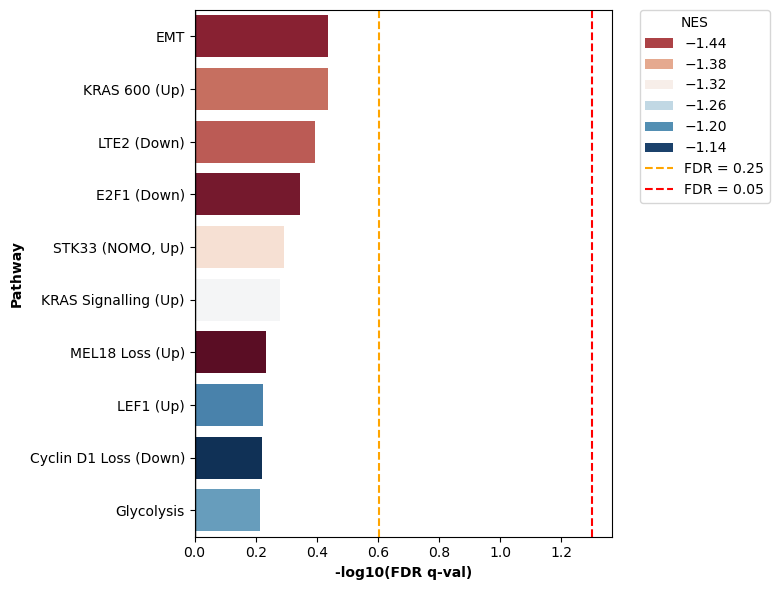

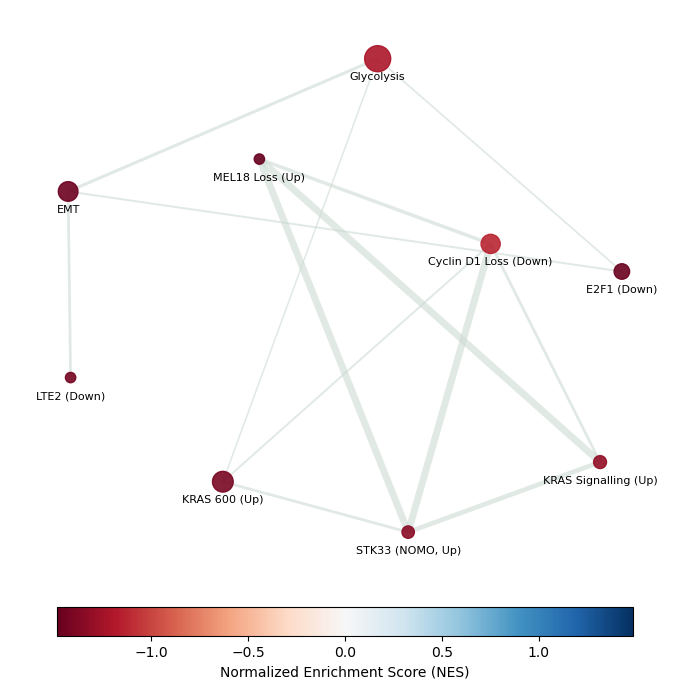

In [11]:
peri_DEG = run_DEG_wilcoxon(
    adata=adata_peritumour,
    response_col='Response',
    celltype_col='specific_cell_types'
)

peri_clean = (peri_DEG
         .assign(pval=peri_DEG['pval'].fillna(1),             # replace NaN values in pval column with 1 (non-significant)
                 log2fc=peri_DEG['log2fc'].fillna(0))         # replace NaN values in lfc column with 0 (no effect size)
         .loc[:, ['gene','score']].dropna())                    # just keep the gene and score columns for ranking

peri_rnk = (peri_clean
         .drop_duplicates('gene', keep='first')                 # drop duplicate genes, keep the first
         .set_index('gene')['score']                            
         .sort_values(ascending=False))

# prerank
pre = gp.prerank(
        rnk=peri_rnk, 
        gene_sets=["MSigDB_Oncogenic_Signatures",
                   "MSigDB_Hallmark_2020"],
        processes=4, 
        permutation_num=1000, 
        seed=7,
        ascending=False)

pre.res2d['ShortName'] = pre.res2d['Term'].map(global_short_names).fillna(pre.res2d['Term'])    # map onto pre for plotting

# GSEA plot 
terms = pre.res2d.Term
ax = pre.plot(terms=terms[1:5],
                   show_ranking=True,               # ranked metric y-axis
                   figsize=(3,4)                  )

# dotplot
global_dotplot = dotplot(pre.res2d,
                         column="FDR q-val",
                         top_term=20,         # show top 20
                         cutoff=1,            # ignore FDR/p-val filtering
                         cmap='Blues',
                         figsize=(5,8),
                         show_ring=False,
                         y='ShortName',
)
global_dotplot.tick_params(axis="y", labelsize=10)
global_dotplot.set_ylabel("Pathway", fontsize=12, fontweight="bold")
global_dotplot.set_xlabel("NES", fontsize=12, fontweight="bold")

# barplot
df = pre.res2d.copy()
df["FDR q-val"] = pd.to_numeric(df["FDR q-val"], errors="coerce")   # make sure FDR q-val column is numeric to prevent log-transform errors
df["-log10(FDR)"] = -np.log10(df["FDR q-val"])                      # add log-transformed FDR q-val column
# Filter top 20 significant terms
df_top = df.sort_values("FDR q-val").head(10)

plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_top, 
            x="-log10(FDR)", 
            y="ShortName", 
            hue="NES", 
            dodge=False, 
            palette="RdBu")

plt.axvline(0, color="black", lw=1)
plt.axvline(x=-np.log10(0.25), color="orange", linestyle="--", linewidth=1.5, label="FDR = 0.25")
plt.axvline(x=-np.log10(0.05), color="red", linestyle="--", linewidth=1.5, label="FDR = 0.05")
ax.set_xlabel("-log10(FDR q-val)", fontsize=10, fontweight="bold")
ax.set_ylabel("Pathway", fontsize=10, fontweight="bold")

# Create the legend first
leg = plt.legend(
    bbox_to_anchor=(1.05, 1.013),
    loc="upper left"
    )
leg.set_title("NES")
leg.get_title().set_position((-10, 0))  # shift title left (adjust -10 as needed)
plt.tight_layout()

# build enrichment map tables
nodes, edges = enrichment_map(pre.res2d, cutoff=1)

# use NES from pre.res2d via ShortName
nes_map = (pre.res2d
           .assign(absNES=lambda d: d["NES"].abs())
           .sort_values("absNES", ascending=False)
           .drop_duplicates("ShortName")
           .set_index("ShortName")["NES"])

nodes["NES_plot"] = nodes["ShortName"].map(nes_map)
# fallback via Term if any missing
if nodes["NES_plot"].isna().any():
    nodes.loc[nodes["NES_plot"].isna(), "NES_plot"] = (
        nodes.loc[nodes["NES_plot"].isna(), "Term"]
             .map(pre.res2d.set_index("Term")["NES"])
    )
nodes["NES_plot"] = nodes["NES_plot"].fillna(0.0)

# Build graph
G = nx.from_pandas_edgelist(
    edges, source="src_idx", target="targ_idx",
    edge_attr=["jaccard_coef", "overlap_coef", "overlap_genes"]
)

# align everything to an explicit nodelist 
nodelist = list(G.nodes())
vals   = nodes.loc[nodelist, "NES_plot"].to_numpy()
sizes  = (nodes.loc[nodelist, "Hits_ratio"] * 1000).to_numpy()
labels = nodes.loc[nodelist, "ShortName"].to_dict()

# colormap, symmetric around 0
abs_max = np.nanmax(np.abs(vals))
norm = mcolors.TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)
cmap = plt.cm.RdBu

# network plot
fig, ax = plt.subplots(figsize=(7,7))
pos = nx.spring_layout(G, seed=42, k=2.5)

nx.draw_networkx_nodes(
    G, pos, nodelist=nodelist,
    node_color=[cmap(norm(v)) for v in vals],
    node_size=sizes, alpha=0.9, ax=ax
)

# keep edge widths aligned
edgelist = list(G.edges())
edge_w = [G[u][v]["jaccard_coef"]*10 for u,v in edgelist]
nx.draw_networkx_edges(G, pos, edgelist=edgelist,
                       width=edge_w, edge_color="#CDDBD4", alpha=0.6, ax=ax)

label_pos = {n:(x, y-0.05) for n,(x,y) in pos.items()}
nx.draw_networkx_labels(G, label_pos, labels=labels, font_size=8, verticalalignment="top", ax=ax)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.046, pad=0.04)
cbar.set_label("Normalized Enrichment Score (NES)")

ax.axis("off")
plt.tight_layout()
plt.show()